In [52]:
import pandas as pd
import sklearn

In [53]:
df = pd.read_csv("Dataset_5971.csv") 

In [54]:
df.head()

,LABEL,TEXT,URL,EMAIL,PHONE
0,ham,Your opinion about me? 1. Over 2. Jada 3. Kusr...,No,No,No
1,ham,What's up? Do you want me to come online? If y...,No,No,No
2,ham,So u workin overtime nigpun?,No,No,No
3,ham,"Also sir, i sent you an email about how to log...",No,No,No
4,Smishing,Please Stay At Home. To encourage the notion o...,No,No,No


In [55]:
df.shape

(5971, 5)

In [56]:
df.isnull().sum()

LABEL    0
TEXT     0
URL      0
EMAIL    0
PHONE    0
dtype: int64

# Basic Statistics

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5971 entries, 0 to 5970
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   LABEL   5971 non-null   object
 1   TEXT    5971 non-null   object
 2   URL     5971 non-null   object
 3   EMAIL   5971 non-null   object
 4   PHONE   5971 non-null   object
dtypes: object(5)
memory usage: 233.4+ KB


In [59]:
df.describe()

,LABEL,TEXT,URL,EMAIL,PHONE
count,5971,5971,5971,5971,5971
unique,5,5949,2,2,2
top,ham,The greatest test of courage on earth is to be...,No,No,No
freq,4844,2,5764,5952,5127


# EDA Exploratory Data Analysis

# N-Gram Analysis

C:\Users\imans\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


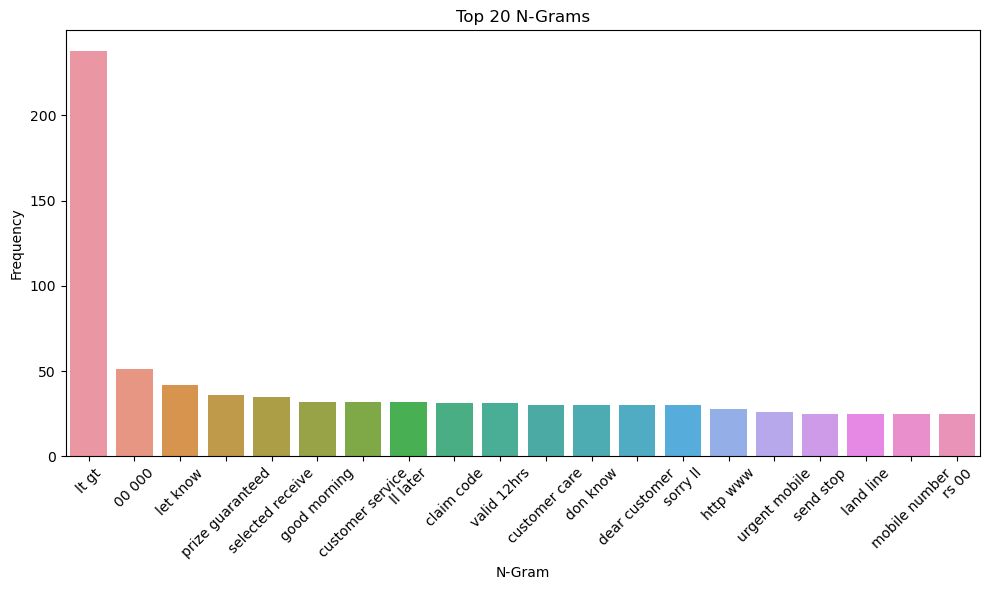

In [62]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer

# Create a CountVectorizer to find the top N-grams
cv = CountVectorizer(ngram_range=(2, 2), stop_words='english')

# Fit and transform the text data
X = cv.fit_transform(df['TEXT'])  # Use the 'TEXT' column for N-gram analysis

# Sum the occurrences of each N-gram
sum_words = X.sum(axis=0)

# Get the N-gram frequencies
words_freq = [(word, sum_words[0, idx]) for word, idx in cv.vocabulary_.items()]
words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)[:20]

# Extract the top N-grams and their frequencies
top_ngrams = [word[0] for word in words_freq]
frequencies = [word[1] for word in words_freq]

# Plot the top N-grams
plt.figure(figsize=(10, 6))
sns.barplot(x=top_ngrams, y=frequencies)
plt.title('Top 20 N-Grams')
plt.xlabel('N-Gram')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# Sentiment Analysis

C:\Users\imans\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


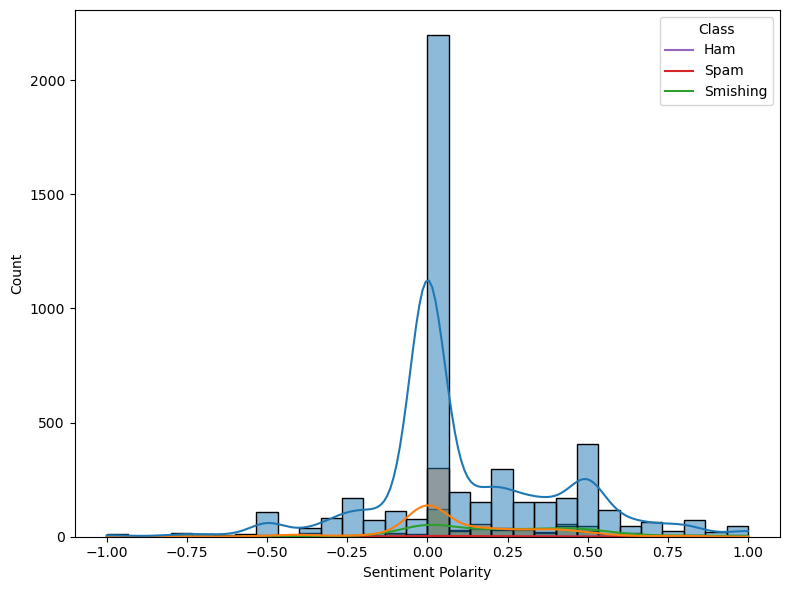

In [64]:
!pip install textblob
from textblob import TextBlob
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate sentiment polarity
df['sentiment'] = df['TEXT'].apply(lambda x: TextBlob(x).sentiment.polarity)

# Plot the sentiment polarity
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='sentiment', hue='LABEL', kde=True, bins=30)  
plt.xlabel('Sentiment Polarity')
plt.ylabel('Count')
plt.legend(title='Class', labels=['Ham', 'Spam',"Smishing"])
plt.tight_layout()
plt.show()

# Keyword Frequency Analysis

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\imans\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
C:\Users\imans\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


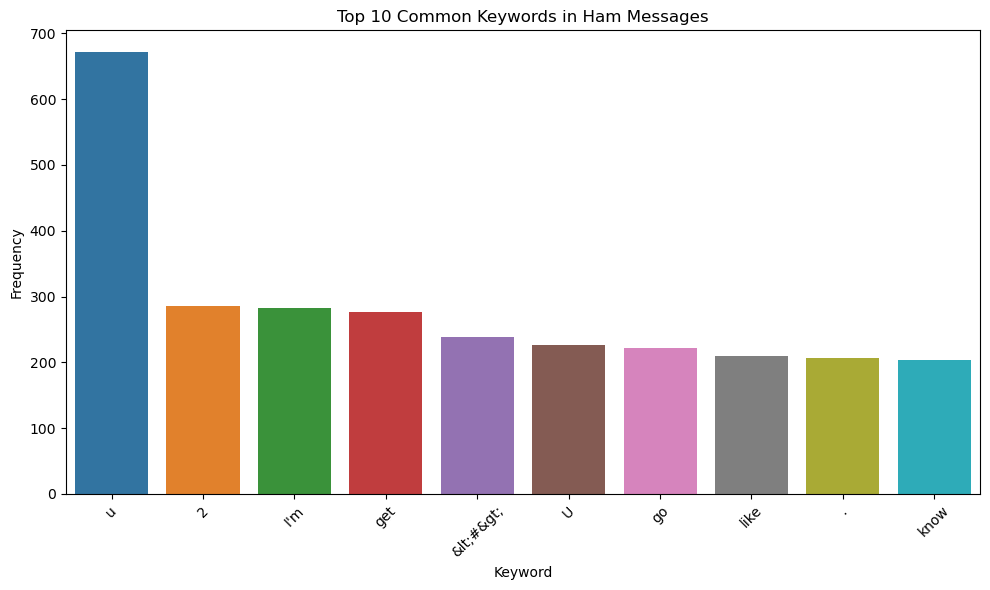

C:\Users\imans\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


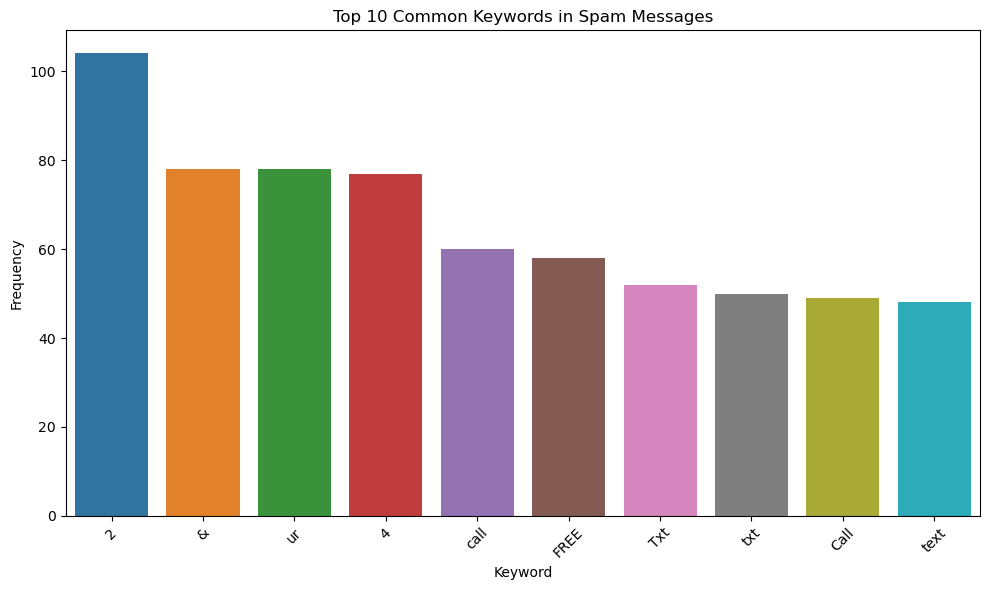

C:\Users\imans\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


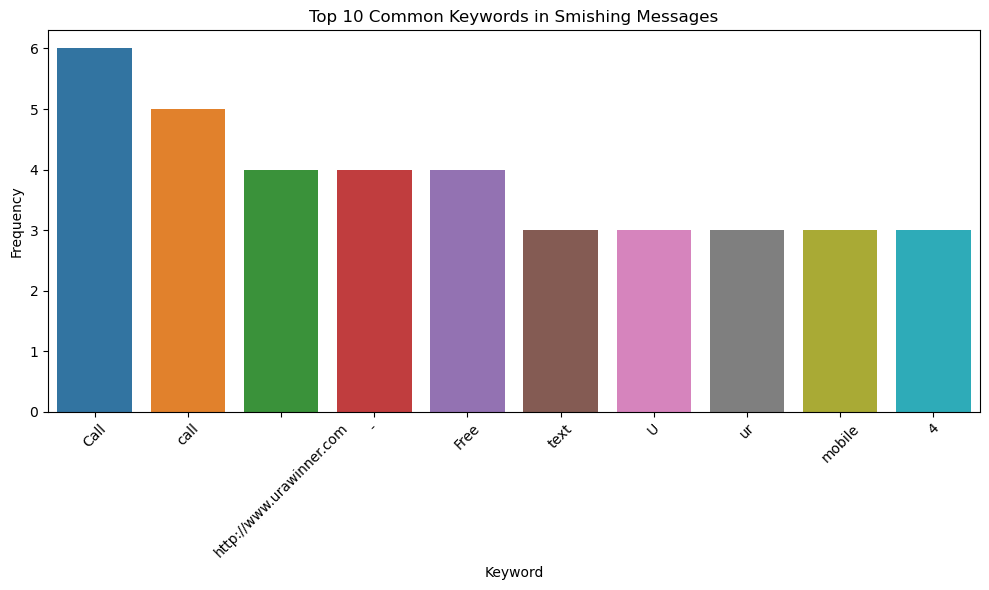

In [66]:
# Keyword Frequency Analysis
from collections import Counter
import nltk
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
import seaborn as sns

# Download stopwords from NLTK
nltk.download('stopwords')

# Proceed with keyword frequency analysis on the filtered keywords

# LABEL column contains the categories and TEXT column contains the text data
ham_keywords = ' '.join(df[df['LABEL'] == 'ham']['TEXT']).split()
spam_keywords = ' '.join(df[df['LABEL'] == 'spam']['TEXT']).split()
smishing_keywords = ' '.join(df[df['LABEL'] == 'smishing']['TEXT']).split()

# Get the English stopwords list
stop_words = set(stopwords.words('english'))

# Remove stopwords from the text data
ham_keywords = [word for word in ham_keywords if word.lower() not in stop_words]
spam_keywords = [word for word in spam_keywords if word.lower() not in stop_words]
smishing_keywords = [word for word in smishing_keywords if word.lower() not in stop_words]

# Calculate the frequency of each keyword
ham_keyword_freq = Counter(ham_keywords)
spam_keyword_freq = Counter(spam_keywords)
smishing_keyword_freq = Counter(smishing_keywords)

# Get the top 10 common keywords for each category
common_ham_keywords = ham_keyword_freq.most_common(10)
common_spam_keywords = spam_keyword_freq.most_common(10)
common_smishing_keywords = smishing_keyword_freq.most_common(10)

# Plot the top 10 common keywords for Ham messages
plt.figure(figsize=(10, 6))
sns.barplot(x=[word[0] for word in common_ham_keywords], y=[word[1] for word in common_ham_keywords])
plt.title('Top 10 Common Keywords in Ham Messages')
plt.xlabel('Keyword')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plot the top 10 common keywords for Spam messages
plt.figure(figsize=(10, 6))
sns.barplot(x=[word[0] for word in common_spam_keywords], y=[word[1] for word in common_spam_keywords])
plt.title('Top 10 Common Keywords in Spam Messages')
plt.xlabel('Keyword')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plot the top 10 common keywords for Smishing messages
plt.figure(figsize=(10, 6))
sns.barplot(x=[word[0] for word in common_smishing_keywords], y=[word[1] for word in common_smishing_keywords])
plt.title('Top 10 Common Keywords in Smishing Messages')
plt.xlabel('Keyword')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# Emotion Analysis

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\imans\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
C:\Users\imans\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\imans\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\imans\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


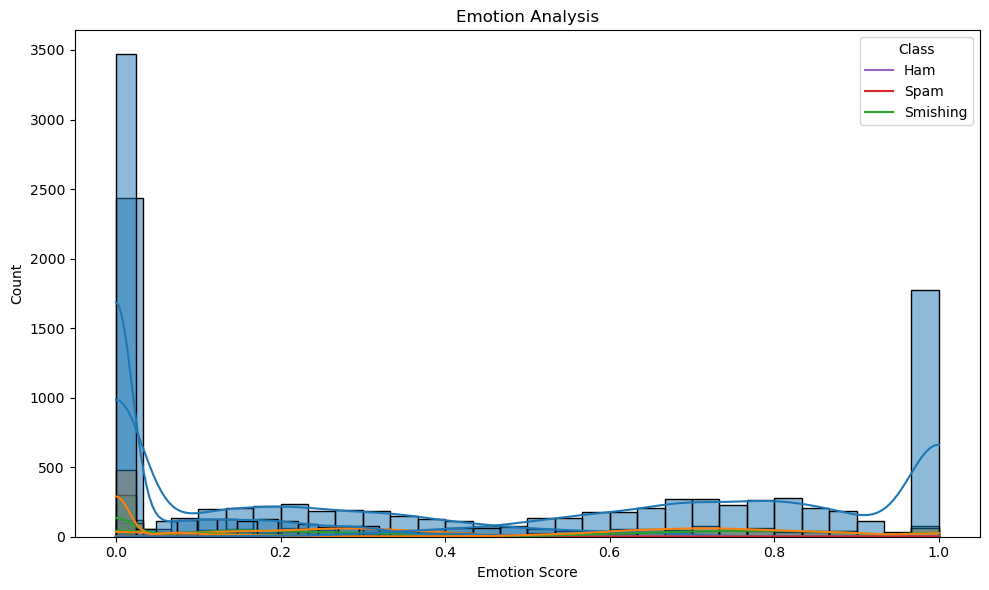

In [68]:
# Emotion Analysis (example using the NLTK library)
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer

nltk.download('vader_lexicon')
sid = SentimentIntensityAnalyzer()

# Apply emotion analysis
df['emotion'] = df['TEXT'].apply(lambda x: sid.polarity_scores(x))
df['positive'] = df['emotion'].apply(lambda x: x['pos'])
df['negative'] = df['emotion'].apply(lambda x: x['neg'])
df['neutral'] = df['emotion'].apply(lambda x: x['neu'])

# Plot the emotion scores
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='positive', hue='LABEL', kde=True, bins=30, alpha=0.5, color='green')
sns.histplot(data=df, x='negative', hue='LABEL', kde=True, bins=30, alpha=0.5, color='red')
sns.histplot(data=df, x='neutral', hue='LABEL', kde=True, bins=30, alpha=0.5, color='blue')
plt.title('Emotion Analysis')
plt.xlabel('Emotion Score')
plt.ylabel('Count')
plt.legend(title='Class', labels=['Ham', 'Spam', 'Smishing'])
plt.tight_layout()
plt.show()

# Topic Modeling 

In [70]:
# Topic Modeling (example using Latent Dirichlet Allocation)
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import CountVectorizer

# Create a CountVectorizer to transform the text data
cv = CountVectorizer(max_features=4000, stop_words='english')
X = cv.fit_transform(df['TEXT'])  # Use the 'TEXT' column for topic modeling

# Initialize and fit the LDA model
lda = LatentDirichletAllocation(n_components=5, random_state=42)
lda.fit(X)

# Function to display the top words in each topic
def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print(f"Topic {topic_idx + 1}:")
        print(" ".join([feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]]))

# Display the top words in each topic
no_top_words = 10
display_topics(lda, cv.get_feature_names_out(), no_top_words)


Topic 1:
free ur text txt mobile reply dear new week www
Topic 2:
lor got like wat going da ur cos home just
Topic 3:
gt lt claim prize customer 000 mobile guaranteed contact won
Topic 4:
ok good come ll day time sorry later did hope
Topic 5:
just know don right life free like love ur want


# Classes Distribution

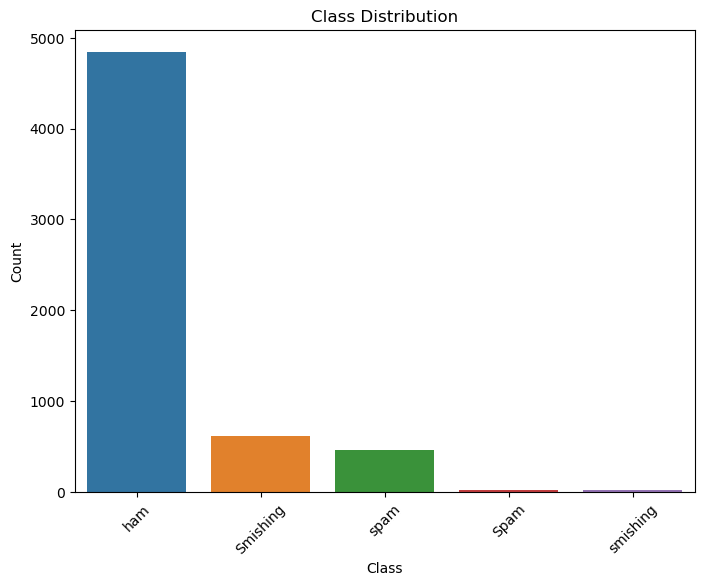

In [72]:
# Plot class distribution
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='LABEL')  # Ensure 'LABEL' is the correct column name for class labels
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate the x-axis labels for better readability if needed
plt.show()

# Messages length distribution

C:\Users\imans\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


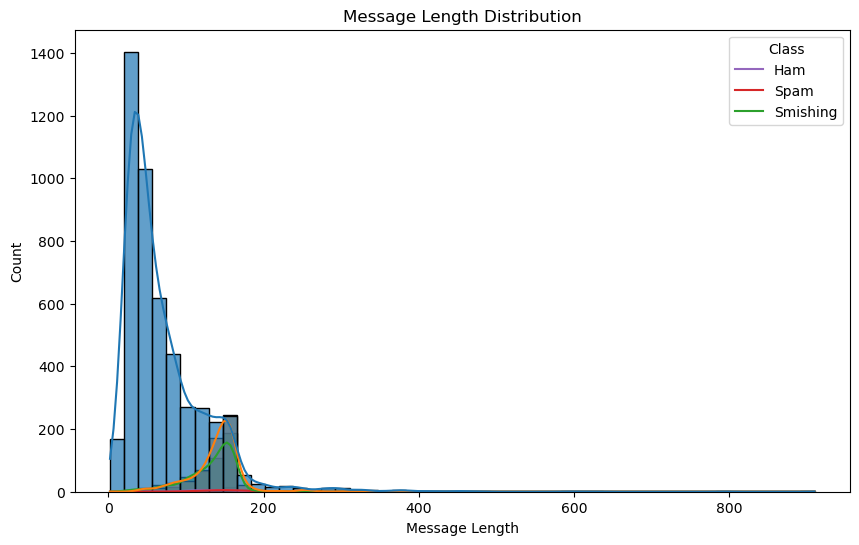

In [74]:
# Plot message length distribution
df['message_length'] = df['TEXT'].apply(len)  # Use the 'TEXT' column for message length calculation
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='message_length', hue='LABEL', bins=50, kde=True, alpha=0.7)  # Ensure 'LABEL' is the correct column name for class labels
plt.title('Message Length Distribution')
plt.xlabel('Message Length')
plt.ylabel('Count')
plt.legend(title='Class', labels=['Ham', 'Spam', 'Smishing'])  # Include all class labels
plt.show()


# Word Clouds 

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\imans\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


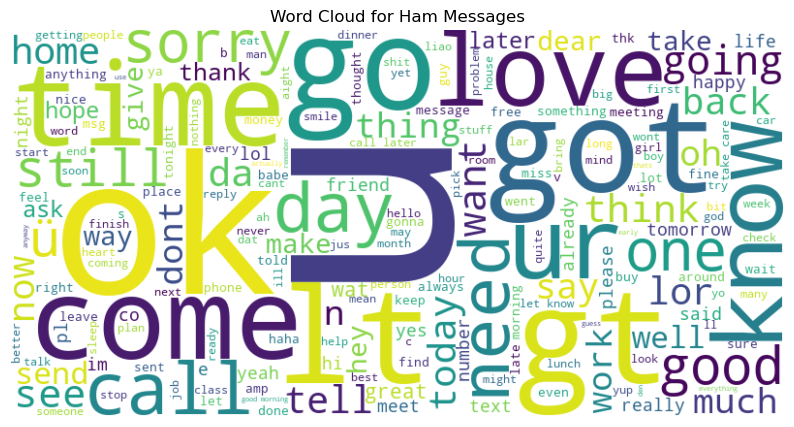

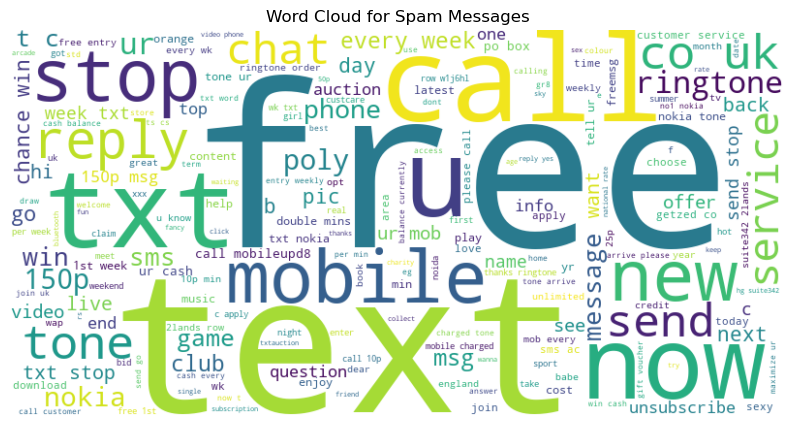

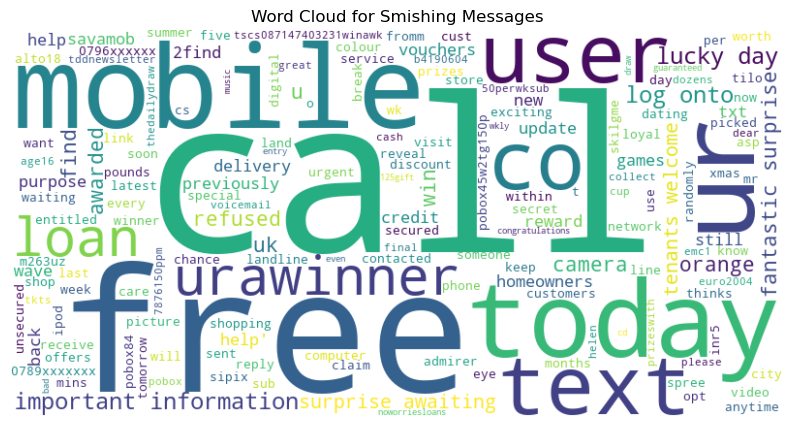

In [76]:
!pip install wordcloud
from wordcloud import WordCloud
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
import nltk

# Download stopwords if not already downloaded
nltk.download('stopwords')

# Define stopwords for English
stop_words = set(stopwords.words('english'))

# Remove stopwords from ham, spam, and smishing messages
ham_messages = df[df['LABEL'] == 'ham']['TEXT'].str.lower().apply(lambda x: ' '.join([word for word in x.split() if word not in stop_words]))
spam_messages = df[df['LABEL'] == 'spam']['TEXT'].str.lower().apply(lambda x: ' '.join([word for word in x.split() if word not in stop_words]))
smishing_messages = df[df['LABEL'] == 'smishing']['TEXT'].str.lower().apply(lambda x: ' '.join([word for word in x.split() if word not in stop_words]))

# Generate word cloud for ham messages
plt.figure(figsize=(10, 8))
wordcloud_ham = WordCloud(width=800, height=400, background_color='white').generate(' '.join(ham_messages))
plt.imshow(wordcloud_ham, interpolation='bilinear')
plt.title('Word Cloud for Ham Messages')
plt.axis('off')
plt.show()

# Generate word cloud for spam messages
plt.figure(figsize=(10, 8))
wordcloud_spam = WordCloud(width=800, height=400, background_color='white').generate(' '.join(spam_messages))
plt.imshow(wordcloud_spam, interpolation='bilinear')
plt.title('Word Cloud for Spam Messages')
plt.axis('off')
plt.show()

# Generate word cloud for smishing messages
plt.figure(figsize=(10, 8))
wordcloud_smishing = WordCloud(width=800, height=400, background_color='white').generate(' '.join(smishing_messages))
plt.imshow(wordcloud_smishing, interpolation='bilinear')
plt.title('Word Cloud for Smishing Messages')
plt.axis('off')
plt.show()


#  Feature Engineering: Cleaning of Dataset and TF-IDF

In [89]:
import pandas as pd
import re
import nltk
from imblearn.over_sampling import RandomOverSampler

# Download necessary NLTK data packages
nltk.download('punkt')
nltk.download('stopwords')

# Clean Text Function
def clean_text(text):
    text = text.lower()
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    text = re.sub(r'http\S+', '', text)
    words = nltk.word_tokenize(text)
    stop_words = set(nltk.corpus.stopwords.words('english'))
    filtered_words = [word for word in words if word not in stop_words]
    stemmer = nltk.PorterStemmer()
    stemmed_words = [stemmer.stem(word) for word in filtered_words]
    return ' '.join(stemmed_words)

# Load and clean dataset
df = pd.read_csv(r"C:\Users\imans\Desktop\Scam Detection\Notebooks\Dataset_5971.csv", encoding='utf-8')
df['clean_text'] = df['TEXT'].apply(lambda x: clean_text(str(x)))
df['LABEL'] = df['LABEL'].str.lower()

# Balance the dataset
X = df['clean_text']
y = df['LABEL']
oversampler = RandomOverSampler(random_state=42)
X_resampled, y_resampled = oversampler.fit_resample(X.values.reshape(-1, 1), y)
X_resampled = X_resampled.flatten()

# Create a new DataFrame for the balanced dataset
df_balanced = pd.DataFrame({'clean_text': X_resampled, 'LABEL': y_resampled})

# Train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_balanced['clean_text'], df_balanced['LABEL'], test_size=0.2, random_state=42)

# TF-IDF vectorization
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer()
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

print("X_train_tfidf shape:", X_train_tfidf.shape)
print("X_test_tfidf shape:", X_test_tfidf.shape)


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\imans\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\imans\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


X_train_tfidf shape: (11625, 6972)
X_test_tfidf shape: (2907, 6972)


# Training the Models

In [104]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report

# Logistic Regression classifier
lr_classifier = LogisticRegression(random_state=42)
lr_classifier.fit(X_train_tfidf, y_train)
y_pred_lr = lr_classifier.predict(X_test_tfidf)

# SVM classifier with probability enabled
svm_classifier = SVC(kernel='linear', probability=True, random_state=42)
svm_classifier.fit(X_train_tfidf, y_train)
y_pred_svm = svm_classifier.predict(X_test_tfidf)

# Random Forest classifier
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train_tfidf, y_train)
y_pred_rf = rf_classifier.predict(X_test_tfidf)

# Confusion matrix and classification report for each classifier
conf_matrix_lr = confusion_matrix(y_test, y_pred_lr)
class_report_lr = classification_report(y_test, y_pred_lr)

conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)
class_report_svm = classification_report(y_test, y_pred_svm)

conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
class_report_rf = classification_report(y_test, y_pred_rf)

print("Logistic Regression - Confusion Matrix:")
print(conf_matrix_lr)
print("\nLogistic Regression - Classification Report:")
print(class_report_lr)

print("SVM - Confusion Matrix:")
print(conf_matrix_svm)
print("\nSVM - Classification Report:")
print(class_report_svm)

print("Random Forest - Confusion Matrix:")
print(conf_matrix_rf)
print("\nRandom Forest - Classification Report:")
print(class_report_rf)

# Function to create a DataFrame for error analysis
def create_error_analysis_df(X_test, y_test, y_pred):
    df = pd.DataFrame({
        'text': X_test,
        'actual_label': y_test,
        'predicted_label': y_pred
    })
    df['is_misclassified'] = df['actual_label'] != df['predicted_label']
    return df

# Logistic Regression Error Analysis
df_lr = create_error_analysis_df(X_test, y_test, y_pred_lr)
df_misclassified_lr = df_lr[df_lr['is_misclassified']]
print("Misclassified Samples for Logistic Regression:")
print(df_misclassified_lr.head())

misclassified_grouped_lr = df_misclassified_lr.groupby(['actual_label', 'predicted_label']).size().reset_index(name='counts')
print("Grouped Misclassified Samples for Logistic Regression:")
print(misclassified_grouped_lr)

# SVM Error Analysis
df_svm = create_error_analysis_df(X_test, y_test, y_pred_svm)
df_misclassified_svm = df_svm[df_svm['is_misclassified']]
print("Misclassified Samples for SVM:")
print(df_misclassified_svm.head())

misclassified_grouped_svm = df_misclassified_svm.groupby(['actual_label', 'predicted_label']).size().reset_index(name='counts')
print("Grouped Misclassified Samples for SVM:")
print(misclassified_grouped_svm)

# Random Forest Error Analysis
df_rf = create_error_analysis_df(X_test, y_test, y_pred_rf)
df_misclassified_rf = df_rf[df_rf['is_misclassified']]
print("Misclassified Samples for Random Forest:")
print(df_misclassified_rf.head())

misclassified_grouped_rf = df_misclassified_rf.groupby(['actual_label', 'predicted_label']).size().reset_index(name='counts')
print("Grouped Misclassified Samples for Random Forest:")
print(misclassified_grouped_rf)


Logistic Regression - Confusion Matrix:
[[975   7   8]
 [  5 919  71]
 [  0  36 886]]

Logistic Regression - Classification Report:
              precision    recall  f1-score   support

         ham       0.99      0.98      0.99       990
    smishing       0.96      0.92      0.94       995
        spam       0.92      0.96      0.94       922

    accuracy                           0.96      2907
   macro avg       0.96      0.96      0.96      2907
weighted avg       0.96      0.96      0.96      2907

SVM - Confusion Matrix:
[[981   3   6]
 [  5 934  56]
 [  0  35 887]]

SVM - Classification Report:
              precision    recall  f1-score   support

         ham       0.99      0.99      0.99       990
    smishing       0.96      0.94      0.95       995
        spam       0.93      0.96      0.95       922

    accuracy                           0.96      2907
   macro avg       0.96      0.96      0.96      2907
weighted avg       0.96      0.96      0.96      2907

Random

# Hard voting Ensemble Learning

In [110]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.ensemble import VotingClassifier

# Function to create a DataFrame for error analysis
def create_error_analysis_df(X_test, y_test, y_pred):
    df = pd.DataFrame({
        'text': X_test,  
        'actual_label': y_test,
        'predicted_label': y_pred
    })
    df['is_misclassified'] = df['actual_label'] != df['predicted_label']
    return df

# Create hard voting classifier
hardvotingEnsembled = VotingClassifier(
    estimators=[
        ('lr', lr_classifier),
        ('svm', svm_classifier),
        ('rf', rf_classifier)
    ],
    voting='hard'
)
hardvotingEnsembled.fit(X_train_tfidf, y_train)
y_pred_hardvoting = hardvotingEnsembled.predict(X_test_tfidf)
conf_matrix_hardvoting = confusion_matrix(y_test, y_pred_hardvoting)
class_report_hardvoting = classification_report(y_test, y_pred_hardvoting)

print("Hard Voting Classifier - Confusion Matrix:")
print(conf_matrix_hardvoting)
print("\nHard Voting Classifier - Classification Report:")
print(class_report_hardvoting)

# Generate the DataFrame for error analysis for hard voting
df_hardvoting = create_error_analysis_df(X_test, y_test, y_pred_hardvoting)
df_misclassified_hardvoting = df_hardvoting[df_hardvoting['is_misclassified']]
print("Misclassified Samples for Hard Voting Classifier:")
print(df_misclassified_hardvoting.head())

# Group by actual and predicted labels to see common misclassifications
misclassified_grouped_hardvoting = df_misclassified_hardvoting.groupby(['actual_label', 'predicted_label']).size().reset_index(name='counts')
print("Grouped Misclassified Samples for Hard Voting:")
print(misclassified_grouped_hardvoting)


Hard Voting Classifier - Confusion Matrix:
[[982   3   5]
 [  5 933  57]
 [  0  35 887]]

Hard Voting Classifier - Classification Report:
              precision    recall  f1-score   support

         ham       0.99      0.99      0.99       990
    smishing       0.96      0.94      0.95       995
        spam       0.93      0.96      0.95       922

    accuracy                           0.96      2907
   macro avg       0.96      0.96      0.96      2907
weighted avg       0.96      0.96      0.96      2907

Misclassified Samples for Hard Voting Classifier:
                                                    text actual_label  \
9023   bear pic nick tom pete dick fact type tri gay ...     smishing   
1087   dear voucher holder next meal us use follow li...     smishing   
7346      current lead bid paus auction send custom care     smishing   
11043  want new video phone anytim network min half p...         spam   
1740   neft transact refer number rs credit beneficia...          

# Soft Voting Ensembled Learning 

In [113]:
# Create soft voting classifier
softvotingEnsembled = VotingClassifier(
    estimators=[
        ('lr', lr_classifier),
        ('svm', svm_classifier),
        ('rf', rf_classifier)
    ],
    voting='soft'
)
softvotingEnsembled.fit(X_train_tfidf, y_train)
y_pred_softvoting = softvotingEnsembled.predict(X_test_tfidf)
conf_matrix_softvoting = confusion_matrix(y_test, y_pred_softvoting)
class_report_softvoting = classification_report(y_test, y_pred_softvoting)

print("Soft Voting Classifier - Confusion Matrix:")
print(conf_matrix_softvoting)
print("\nSoft Voting Classifier - Classification Report:")
print(class_report_softvoting)

# Generate the DataFrame for error analysis for soft voting
df_softvoting = create_error_analysis_df(X_test, y_test, y_pred_softvoting)
df_misclassified_softvoting = df_softvoting[df_softvoting['is_misclassified']]
print("Misclassified Samples for Soft Voting Classifier:")
print(df_misclassified_softvoting.head())

# Group by actual and predicted labels to see common misclassifications
misclassified_grouped_softvoting = df_misclassified_softvoting.groupby(['actual_label', 'predicted_label']).size().reset_index(name='counts')
print("Grouped Misclassified Samples for Soft Voting:")
print(misclassified_grouped_softvoting)



Soft Voting Classifier - Confusion Matrix:
[[983   3   4]
 [  0 951  44]
 [  0  35 887]]

Soft Voting Classifier - Classification Report:
              precision    recall  f1-score   support

         ham       1.00      0.99      1.00       990
    smishing       0.96      0.96      0.96       995
        spam       0.95      0.96      0.96       922

    accuracy                           0.97      2907
   macro avg       0.97      0.97      0.97      2907
weighted avg       0.97      0.97      0.97      2907

Misclassified Samples for Soft Voting Classifier:
                                                    text actual_label  \
9023   bear pic nick tom pete dick fact type tri gay ...     smishing   
1087   dear voucher holder next meal us use follow li...     smishing   
7346      current lead bid paus auction send custom care     smishing   
11043  want new video phone anytim network min half p...         spam   
1740   neft transact refer number rs credit beneficia...          

C:\Users\imans\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


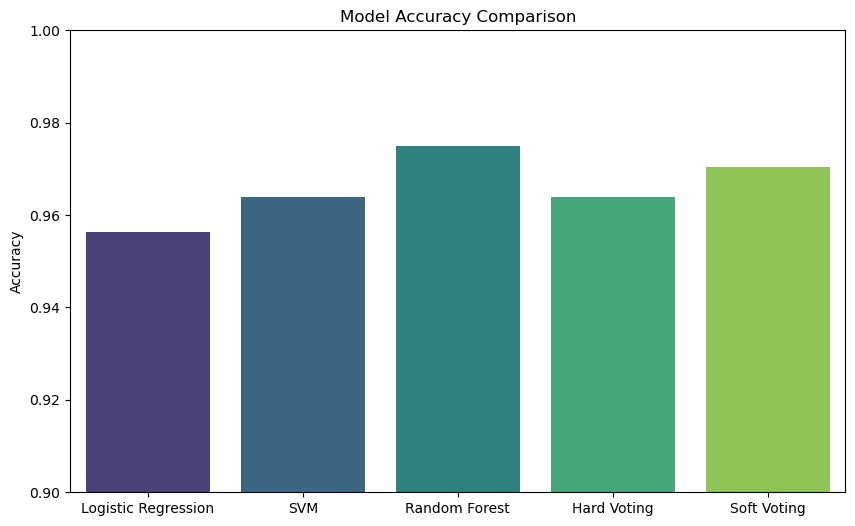

In [129]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

# Create a function to plot confusion matrices
def plot_confusion_matrix(y_true, y_pred, title):
    conf_matrix = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
    plt.title(f'Confusion Matrix: {title}')
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

# Plot accuracy scores
accuracies = [accuracy_lr, accuracy_svm, accuracy_rf, accuracy_hard_voting, accuracy_soft_voting]
models = ['Logistic Regression', 'SVM', 'Random Forest', 'Hard Voting', 'Soft Voting']
plt.figure(figsize=(10, 6))
sns.barplot(x=models, y=accuracies, palette="viridis")
plt.title('Model Accuracy Comparison')
plt.ylabel('Accuracy')
plt.ylim(0.9, 1)
plt.show()

# Cross Validation using Stratified K-Fold 

In [106]:
from sklearn.model_selection import StratifiedKFold, cross_val_score

# Cross-validation function
def cross_validate_model(model, X, y, cv):
    scores = cross_val_score(model, X, y, cv=cv, scoring='accuracy')
    return scores

# Define Stratified K-Fold cross-validator
stratified_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Perform cross-validation for Logistic Regression
cv_scores_lr = cross_validate_model(lr_classifier, X_train_tfidf, y_train, stratified_kfold)
print("Logistic Regression CV Scores:", cv_scores_lr)
print("Mean CV Accuracy:", cv_scores_lr.mean())
print("Standard Deviation of CV Accuracy:", cv_scores_lr.std())

# Perform cross-validation for SVM
cv_scores_svm = cross_validate_model(svm_classifier, X_train_tfidf, y_train, stratified_kfold)
print("\nSVM CV Scores:", cv_scores_svm)
print("Mean CV Accuracy:", cv_scores_svm.mean())
print("Standard Deviation of CV Accuracy:", cv_scores_svm.std())

# Perform cross-validation for Random Forest
cv_scores_rf = cross_validate_model(rf_classifier, X_train_tfidf, y_train, stratified_kfold)
print("\nRandom Forest CV Scores:", cv_scores_rf)
print("Mean CV Accuracy:", cv_scores_rf.mean())
print("Standard Deviation of CV Accuracy:", cv_scores_rf.std())

# Perform cross-validation for Hard Voting Classifier
cv_scores_hardvoting = cross_validate_model(hardvotingEnsembled, X_train_tfidf, y_train, stratified_kfold)
print("\nHard Voting Classifier CV Scores:", cv_scores_hardvoting)
print("Mean CV Accuracy:", cv_scores_hardvoting.mean())
print("Standard Deviation of CV Accuracy:", cv_scores_hardvoting.std())

# Perform cross-validation for Soft Voting Classifier
cv_scores_softvoting = cross_validate_model(softvotingEnsembled, X_train_tfidf, y_train, stratified_kfold)
print("\nSoft Voting Classifier CV Scores:", cv_scores_softvoting)
print("Mean CV Accuracy:", cv_scores_softvoting.mean())
print("Standard Deviation of CV Accuracy:", cv_scores_softvoting.std())


Logistic Regression CV Scores: [0.96430108 0.95655914 0.96473118 0.96215054 0.95913978]
Mean CV Accuracy: 0.9613763440860215
Standard Deviation of CV Accuracy: 0.0031182054125405514

SVM CV Scores: [0.96645161 0.96258065 0.97032258 0.96817204 0.9711828 ]
Mean CV Accuracy: 0.967741935483871
Standard Deviation of CV Accuracy: 0.0030655534935407464

Random Forest CV Scores: [0.97376344 0.9711828  0.97806452 0.97978495 0.98064516]
Mean CV Accuracy: 0.9766881720430106
Standard Deviation of CV Accuracy: 0.003633326809796602

Hard Voting Classifier CV Scores: [0.96989247 0.96473118 0.97204301 0.96860215 0.9716129 ]
Mean CV Accuracy: 0.9693763440860215
Standard Deviation of CV Accuracy: 0.0026289388025696483

Soft Voting Classifier CV Scores: [0.97204301 0.96602151 0.97634409 0.97376344 0.97204301]
Mean CV Accuracy: 0.9720430107526881
Standard Deviation of CV Accuracy: 0.003397577231506474


C:\Users\imans\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


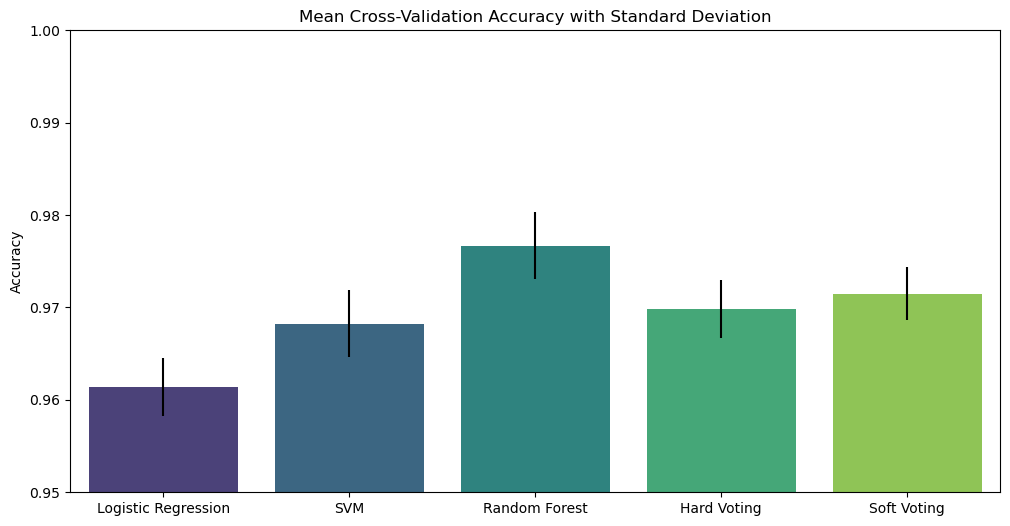

In [131]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Cross-validation scores
cv_scores_lr = [0.96430108, 0.95655914, 0.96473118, 0.96215854, 0.95913978]
cv_scores_svm = [0.96645161, 0.96258065, 0.97282052, 0.96817204, 0.9711828]
cv_scores_rf = [0.97376344, 0.9711828, 0.97806452, 0.97979495, 0.98064516]
cv_scores_hardvoting = [0.96989247, 0.96473118, 0.97431807, 0.96860215, 0.9716129]
cv_scores_softvoting = [0.97204301, 0.96602151, 0.97364409, 0.97376344, 0.97204301]

# Calculate mean and standard deviation for each classifier
mean_scores = [
    np.mean(cv_scores_lr),
    np.mean(cv_scores_svm),
    np.mean(cv_scores_rf),
    np.mean(cv_scores_hardvoting),
    np.mean(cv_scores_softvoting)
]

std_devs = [
    np.std(cv_scores_lr),
    np.std(cv_scores_svm),
    np.std(cv_scores_rf),
    np.std(cv_scores_hardvoting),
    np.std(cv_scores_softvoting)
]

# Classifier names
classifiers = ['Logistic Regression', 'SVM', 'Random Forest', 'Hard Voting', 'Soft Voting']

# Create a bar plot with error bars
plt.figure(figsize=(12, 6))
sns.barplot(x=classifiers, y=mean_scores, palette="viridis", yerr=std_devs)
plt.title('Mean Cross-Validation Accuracy with Standard Deviation')
plt.ylabel('Accuracy')
plt.ylim(0.95, 1)
plt.show()


### Logistic Regression:

The logistic regression model has a good mean accuracy but slightly lower than the other models. The standard deviation indicates consistent performance across folds.
### SVM:

The SVM model performs better than logistic regression, with a higher mean accuracy and similar consistency.
### Random Forest:

The Random Forest model shows the highest mean accuracy among individual classifiers, indicating strong performance. The slightly higher standard deviation suggests more variability across the folds compared to SVM.

### Hard Voting Classifier:

The hard voting classifier improves upon the individual classifiers' performances, but it's slightly lower than the soft voting classifier. The standard deviation is the lowest, indicating very consistent performance.

### Soft Voting Classifier:

The soft voting classifier shows a slight improvement over the hard voting classifier and most individual classifiers. The standard deviation is low, indicating consistent performance across folds.

# Saving the the best model and TF-IDF Vectorizer

In [ ]:
import pickle

# Save the trained soft voting classifier
with open('soft_voting_classifier.pkl', 'wb') as file:
    pickle.dump(softvotingEnsembled, file)

# Save the TF-IDF vectorizer
with open('tfidf_vectorizer.pkl', 'wb') as file:
    pickle.dump(tfidf_vectorizer, file)

print("Soft voting classifier and TF-IDF vectorizer have been saved.")
